# Exploratory Data Analysis (EDA) — ChatGPT Reviews

This notebook answers the **10 key EDA questions** defined in the project.
We will:
- Explore ratings distribution
- Helpful votes analysis
- Word clouds (positive vs negative)
- Rating trends over time
- Ratings by location, platform, version
- Verified vs non-verified comparison
- Review length analysis
- Keywords in 1-star reviews


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load preprocessed dataset
df = pd.read_csv('preprocessed_reviews.csv')
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment,review_clean,platform_encoded,verified_encoded,version_encoded
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,Negative,impressive natural language understanding almo...,3,0,10
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,Negative,sometimes give wrong answer outdated info stud...,2,0,17
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,Positive,great tool generating content quickly interest...,1,0,37
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,Neutral,great tool generating content quickly start me...,0,0,39
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,Negative,excellent language translation grammar fix pri...,2,1,43


## Q1. Distribution of Review Ratings
- Visualization: Bar chart (1–5 stars)
- Insight: Understand overall sentiment — are users mostly happy or frustrated?

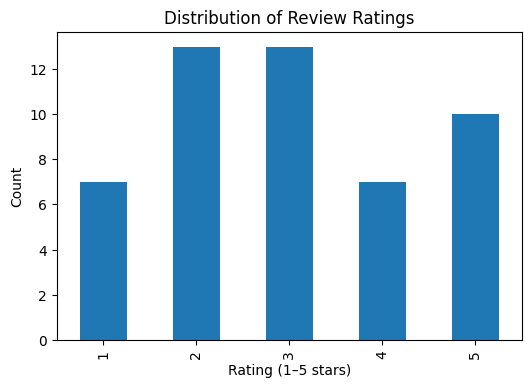

rating
1     7
2    13
3    13
4     7
5    10
Name: count, dtype: int64

In [2]:
df['rating'].value_counts().sort_index().plot(kind='bar', figsize=(6,4))
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (1–5 stars)')
plt.ylabel('Count')
plt.show()

df['rating'].value_counts().sort_index()

## Q2. Helpful Reviews (>10 votes)
- Visualization: Pie chart
- Insight: See how much value users find in reviews.

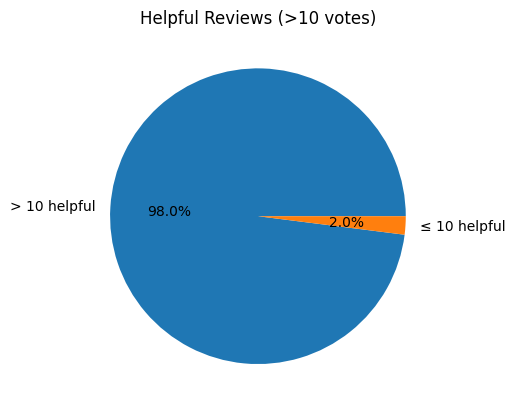

>10 helpful: 49 | <=10 helpful: 1


In [3]:
helpful = df['helpful_votes'].fillna(0)
gt10 = (helpful > 10).sum()
le10 = (helpful <= 10).sum()

plt.pie([gt10, le10], labels=['> 10 helpful', '≤ 10 helpful'], autopct='%1.1f%%')
plt.title('Helpful Reviews (>10 votes)')
plt.show()

print('>10 helpful:', gt10, '| <=10 helpful:', le10)

## Q3. Common Keywords in Positive vs Negative Reviews
- Visualization: Word Clouds
- Insight: Discover what users love or complain about.

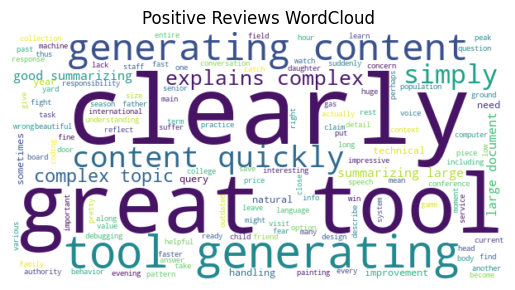

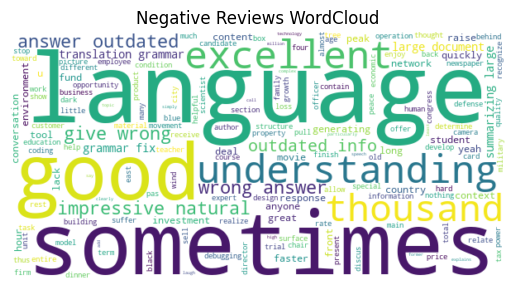

In [4]:
pos_text = ' '.join(df[df['rating'] >= 4]['review_clean'].dropna())
neg_text = ' '.join(df[df['rating'] <= 2]['review_clean'].dropna())

wc_pos = WordCloud(width=600, height=300, background_color='white').generate(pos_text)
wc_neg = WordCloud(width=600, height=300, background_color='white').generate(neg_text)

plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews WordCloud')
plt.show()

plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud')
plt.show()

## Q4. Average Rating Over Time
- Visualization: Line chart
- Insight: Track user satisfaction trends over time.

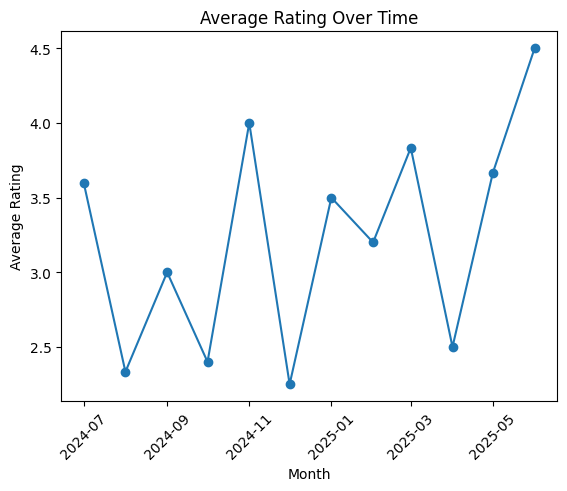

In [5]:
if 'date' in df.columns and df['date'].notna().any():
    df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
    trend = df.groupby('month')['rating'].mean()
    
    plt.plot(trend.index, trend.values, marker='o')
    plt.title('Average Rating Over Time')
    plt.xlabel('Month')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()
    
    trend

## Q5. Ratings by Location
- Visualization: Bar chart
- Insight: Identify regional differences in satisfaction.

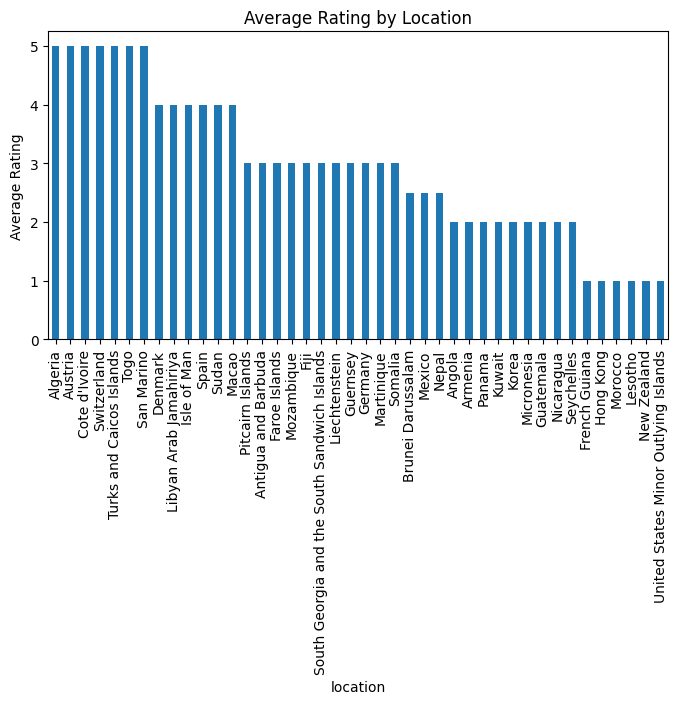

location
Algeria                                         5.0
Austria                                         5.0
Cote d'Ivoire                                   5.0
Switzerland                                     5.0
Turks and Caicos Islands                        5.0
Togo                                            5.0
San Marino                                      5.0
Denmark                                         4.0
Libyan Arab Jamahiriya                          4.0
Isle of Man                                     4.0
Spain                                           4.0
Sudan                                           4.0
Macao                                           4.0
Pitcairn Islands                                3.0
Antigua and Barbuda                             3.0
Faroe Islands                                   3.0
Mozambique                                      3.0
Fiji                                            3.0
South Georgia and the South Sandwich Islands    3.0
Lie

In [6]:
df.groupby('location')['rating'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(8,4))
plt.title('Average Rating by Location')
plt.ylabel('Average Rating')
plt.show()

df.groupby('location')['rating'].mean().sort_values(ascending=False)

## Q6. Ratings by Platform
- Visualization: Bar chart
- Insight: Which platform (Web vs Mobile etc.) gets better reviews.

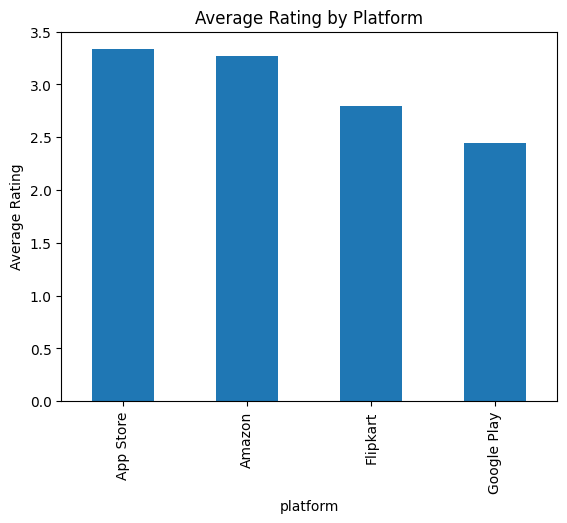

platform
App Store      3.333333
Amazon         3.272727
Flipkart       2.800000
Google Play    2.444444
Name: rating, dtype: float64

In [7]:
df.groupby('platform')['rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Platform')
plt.ylabel('Average Rating')
plt.show()

df.groupby('platform')['rating'].mean().sort_values(ascending=False)

## Q7. Verified vs Non-Verified Users
- Visualization: Bar chart
- Insight: Are loyal/paying users happier?

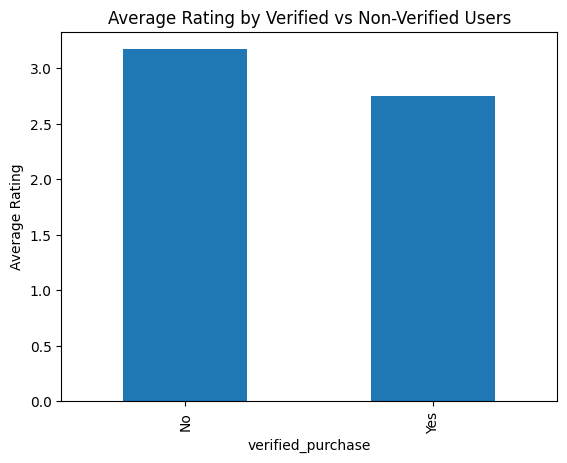

verified_purchase
No     3.166667
Yes    2.750000
Name: rating, dtype: float64

In [8]:
df.groupby('verified_purchase')['rating'].mean().plot(kind='bar')
plt.title('Average Rating by Verified vs Non-Verified Users')
plt.ylabel('Average Rating')
plt.show()

df.groupby('verified_purchase')['rating'].mean()

## Q8. Review Length vs Rating
- Visualization: Box plot
- Insight: Do people write longer reviews when unhappy or very happy?

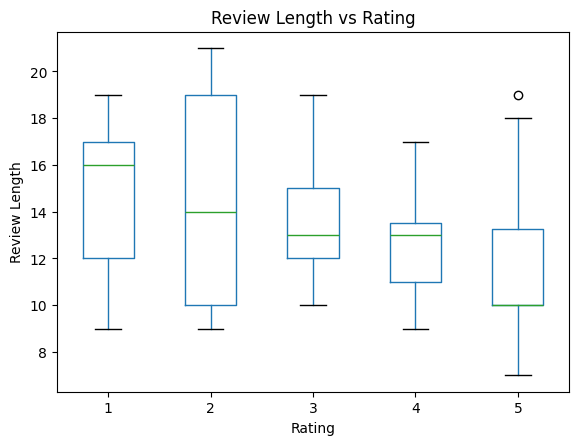

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,7.0,14.571429,3.690399,9.0,12.0,16.0,17.00,19.0
2,13.0,14.153846,4.298181,9.0,10.0,14.0,19.00,21.0
3,13.0,13.692308,2.393903,10.0,12.0,13.0,15.00,19.0
4,7.0,12.571429,2.636737,9.0,11.0,13.0,13.50,17.0
5,10.0,11.800000,3.938415,7.0,10.0,10.0,13.25,19.0


In [9]:
df.boxplot(column='review_length', by='rating', grid=False)
plt.title('Review Length vs Rating')
plt.suptitle('')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

df.groupby('rating')['review_length'].describe()

## Q9. Keywords in 1-Star Reviews
- Visualization: Word Cloud
- Insight: Spot recurring issues in the lowest ratings.

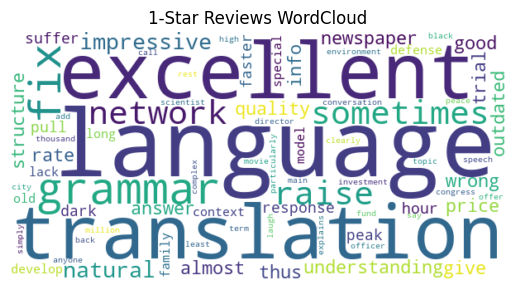

In [10]:
one_star_text = ' '.join(df[df['rating']==1]['review_clean'].dropna())
wc_one_star = WordCloud(width=600, height=300, background_color='white').generate(one_star_text)

plt.imshow(wc_one_star, interpolation='bilinear')
plt.axis('off')
plt.title('1-Star Reviews WordCloud')
plt.show()

## Q10. Ratings by ChatGPT Version
- Visualization: Bar chart
- Insight: Which version has the highest satisfaction.

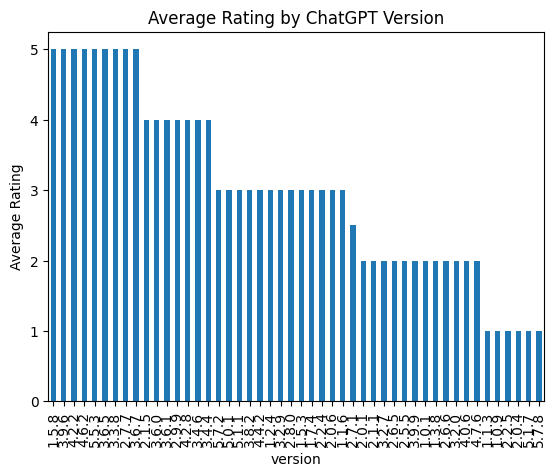

version
1.5.8    5.0
3.9.6    5.0
4.2.2    5.0
4.6.2    5.0
5.5.3    5.0
3.6.5    5.0
3.3.8    5.0
2.7.7    5.0
3.6.7    5.0
2.1.5    4.0
3.6.0    4.0
3.6.1    4.0
2.9.9    4.0
4.2.8    4.0
3.4.6    4.0
3.4.4    4.0
5.7.2    3.0
5.0.1    3.0
5.1.1    3.0
3.8.2    3.0
4.4.2    3.0
1.2.4    3.0
3.2.9    3.0
2.8.0    3.0
1.5.3    3.0
1.7.4    3.0
2.2.4    3.0
2.0.6    3.0
1.1.6    3.0
2.7.1    2.5
2.0.1    2.0
2.1.1    2.0
3.2.7    2.0
2.6.5    2.0
2.5.5    2.0
3.9.9    2.0
1.0.1    2.0
1.3.8    2.0
2.6.6    2.0
3.2.0    2.0
4.0.6    2.0
4.7.6    2.0
1.1.3    1.0
1.0.9    1.0
2.2.5    1.0
2.0.4    1.0
5.1.7    1.0
5.7.8    1.0
Name: rating, dtype: float64

In [11]:
df.groupby('version')['rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by ChatGPT Version')
plt.ylabel('Average Rating')
plt.show()

df.groupby('version')['rating'].mean().sort_values(ascending=False)